**Analysis on Published Medical Care on COVID-19**

**What has been published about medical care?
COVID-19 Open Research Dataset Challenge (CORD-19)**

Task Details
What has been published about medical care? What has been published concerning surge capacity and nursing homes? What has been published concerning efforts to inform allocation of scarce resources? What do we know about personal protective equipment? What has been published concerning alternative methods to advise on disease management? What has been published concerning processes of care? What do we know about the clinical characterization and management of the virus?

Specifically, we want to know what the literature reports about:

Resources to support skilled nursing facilities and long term care facilities.
Mobilization of surge medical staff to address shortages in overwhelmed communities
Age-adjusted mortality data for Acute Respiratory Distress Syndrome (ARDS) with/without other organ failure – particularly for viral etiologies
Extracorporeal membrane oxygenation (ECMO) outcomes data of COVID-19 patients
Outcomes data for COVID-19 after mechanical ventilation adjusted for age.
Knowledge of the frequency, manifestations, and course of extrapulmonary manifestations of COVID-19, including, but not limited to, possible cardiomyopathy and cardiac arrest.
Application of regulatory standards (e.g., EUA, CLIA) and ability to adapt care to crisis standards of care level.
Approaches for encouraging and facilitating the production of elastomeric respirators, which can save thousands of N95 masks.
Best telemedicine practices, barriers and faciitators, and specific actions to remove/expand them within and across state boundaries.
Guidance on the simple things people can do at home to take care of sick people and manage disease.
Oral medications that might potentially work.
Use of AI in real-time health care delivery to evaluate interventions, risk factors, and outcomes in a way that could not be done manually.
Best practices and critical challenges and innovative solutions and technologies in hospital flow and organization, workforce protection, workforce allocation, community-based support resources, payment, and supply chain management to enhance capacity, efficiency, and outcomes.
Efforts to define the natural history of disease to inform clinical care, public health interventions, infection prevention control, transmission, and clinical trials
Efforts to develop a core clinical outcome set to maximize usability of data across a range of trials
Efforts to determine adjunctive and supportive interventions that can improve the clinical outcomes of infected patients (e.g. steroids, high flow oxygen).

The documentation and the code can be found in my github [here](https://github.com/ednasawe/COVID-19-Visualization-of-Virus-Origin-Genetic-Evolution)

******TASK DETAILS**

1. What has been published about medical care? 
2. What has been published concerning surge capacity and nursing homes? 
3. What has been published concerning efforts to inform allocation of scarce resources? 
4. What do we know about personal protective equipment? 
5. What has been published concerning alternative methods to advise on disease management? 
6. What has been published concerning processes of care? 
7. What do we know about the clinical characterization and management of the virus?
8. Resources to support skilled nursing facilities and long term care facilities. 
9. Mobilization of surge medical staff to address shortages in overwhelmed communities 
10. Age-adjusted mortality data for Acute Respiratory Distress Syndrome (ARDS) with/without other organ failure – particularly for viral etiologies 
11. Extracorporeal membrane oxygenation (ECMO) outcomes data of COVID-19 patients 
12. Outcomes data for COVID-19 after mechanical ventilation adjusted for age. 
13. Knowledge of the frequency, manifestations, and course of extrapulmonary manifestations of COVID-19, including, but not limited to, possible cardiomyopathy and cardiac arrest. 
14. Application of regulatory standards (e.g., EUA, CLIA) and ability to adapt care to crisis standards of care level.
15. Approaches for encouraging and facilitating the production of elastomeric respirators, which can save thousands of N95 masks. 
16. Best telemedicine practices, barriers and faciitators, and specific actions to remove/expand them within and across state boundaries. 
17. Guidance on the simple things people can do at home to take care of sick people and manage disease. 
18. Oral medications that might potentially work. 
19. Use of AI in real-time health care delivery to evaluate interventions, risk factors, and outcomes in a way that could not be done manually. 
20. Best practices and critical challenges and innovative solutions and technologies in hospital flow and organization, workforce protection, workforce allocation, community-based support resources, payment, and supply chain management to enhance capacity, efficiency, and outcomes. 
21. Efforts to define the natural history of disease to inform clinical care, public health interventions, infection prevention control, transmission, and clinical trials 
22. Efforts to develop a core clinical outcome set to maximize usability of data across a range of trials 
23. Efforts to determine adjunctive and supportive interventions that can improve the clinical outcomes of infected patients (e.g. steroids, high flow oxygen).

**Import the Libraries**

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import xgboost as xgb


plt.rcParams.update({'font.size': 14})


**Loading the Data**

In [2]:
# Load data

meta_dt = pd.read_csv("/kaggle/input/CORD-19-research-challenge/metadata.csv")


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print (meta_dt.shape)

(47298, 18)


There are 45774 datasets with 17 columns in the metadata.csv file.

**Basic Exploration of the dataset**

In [4]:
meta_dt.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,8q5ondtn,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(72)90077-4
1,pzfd0e50,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(80)90355-5
2,22bka3gi,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(80)90356-7
3,zp9k1k3z,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/0002-9343(73)90176-9
4,cjuzul89,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-9343(85)90361-4


**Preprocess data**

~ Transform categories into discrete numerical values
~ Transform all words to lowercase
~ To remove all punctuations

**Splitting of the data set into Train and Test data sets**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    meta_dt['has_pdf_parse'], 
    meta_dt['title'], 
    random_state = 1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  35473
Test dataset:  11825


**Eliminating any duplicates**

In [7]:
meta_dt.duplicated().sum()


0

In [8]:
meta_dt = meta_dt.drop_duplicates().reset_index(drop=True)


**Visualizing of the Data**

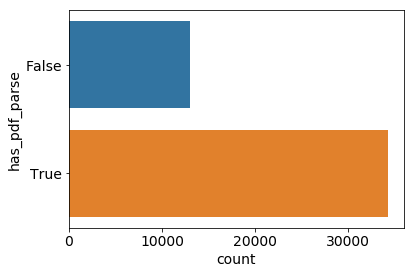

In [10]:
sns.countplot(y=meta_dt.has_pdf_parse);

In [11]:
meta_dt.has_pdf_parse.value_counts()


True     34283
False    13015
Name: has_pdf_parse, dtype: int64

In [12]:
meta_dt.isnull().sum()

cord_uid                           0
sha                            13015
source_x                           0
title                            158
doi                             3342
pmcid                          19260
pubmed_id                      11889
license                            0
abstract                        8250
publish_time                       9
authors                         2109
journal                         4404
Microsoft Academic Paper ID    46334
WHO #Covidence                 45530
has_pdf_parse                      0
has_pmc_xml_parse                  0
full_text_file                  8829
url                              302
dtype: int64

Based on the above data visualization and evaluation, we find that the full text is all non-null. And that most of the published articles have full texts available.

Checking the full text file on the metadata.csv file for uniques keywords

In [15]:
# Checking all the full text files on the metadata.csv files for uniques keywords

print (meta_dt.has_pmc_xml_parse.nunique())
print (meta_dt.has_pdf_parse.nunique())


2
2


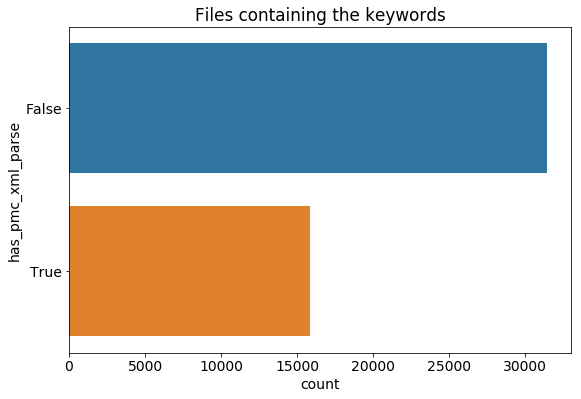

In [16]:
# Most common keywords found

plt.figure(figsize=(9,6))
sns.countplot(y=meta_dt.has_pmc_xml_parse, order = meta_dt.has_pmc_xml_parse.value_counts().iloc[:15].index)
plt.title('Files containing the keywords')
plt.show()

# meta_dt.keyword.value_counts().head(10)

The above graph shows that the four files have the texts we need to analyze the published articles. Custom_license has more counts than the biorxiv_medrxiv file.

In [17]:
# Check number of unique keywords and journals

print (meta_dt.journal.nunique())

5029


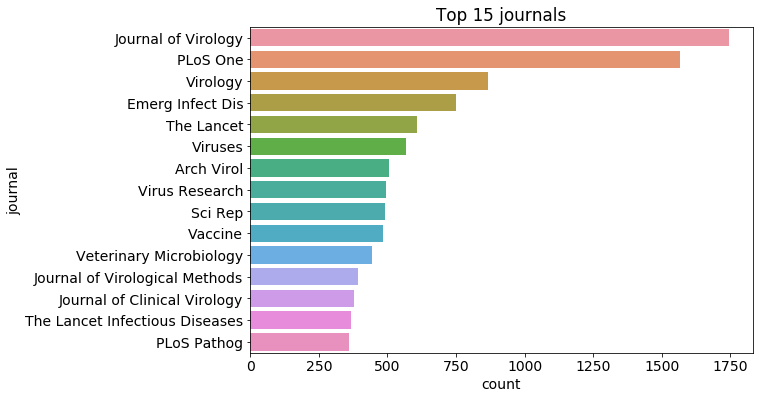

In [18]:
# Most common journals we have

plt.figure(figsize=(9,6))
sns.countplot(y=meta_dt.journal, order = meta_dt.journal.value_counts().iloc[:15].index)
plt.title('Top 15 journals')
plt.show()

The journals are mostly on virology,vaccines, and virus research; meaning they will be helpful in analysing the medical care for the viral disease COVID-19.

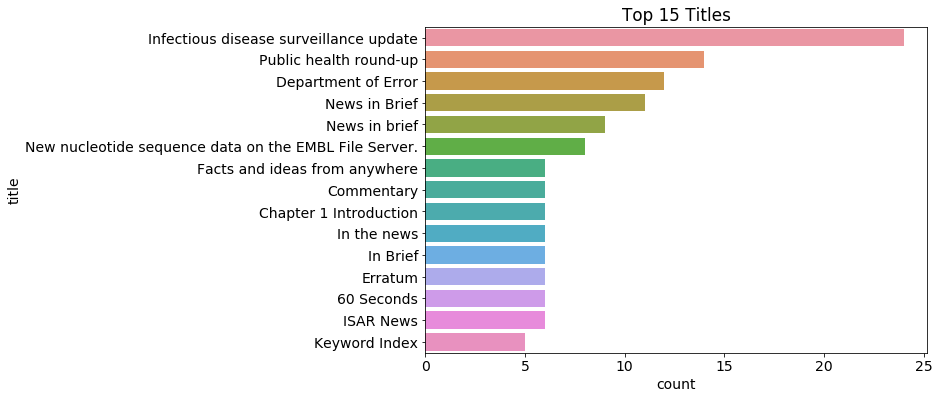

In [19]:
# Most common titles of the articles we have

plt.figure(figsize=(9,6))
sns.countplot(y=meta_dt.title, order = meta_dt.title.value_counts().iloc[:15].index)
plt.title('Top 15 Titles')
plt.show()

The above graph show that we have more articles with the title "Infectious disease surveillance update" and less articles on "Patent reports" and "Abstracts cont."
Using the top 15 titles provided above, we will be able to narrow down on the specific thing we are supposed to look for and analyze:

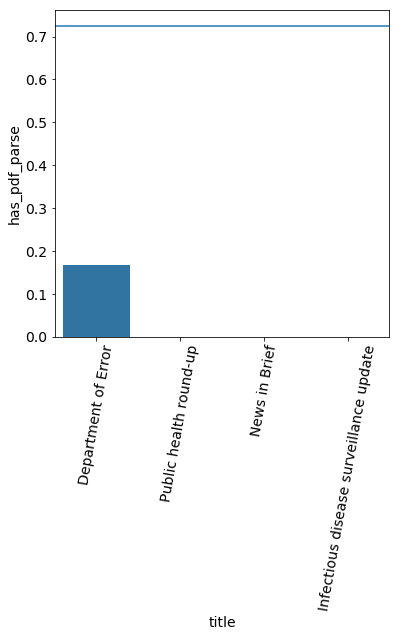

In [20]:
raw_loc = meta_dt.title.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = meta_dt[meta_dt.title.isin(top_loc)]

top_l = top_only.groupby('title').mean()['has_pdf_parse'].sort_values(ascending=False)
plt.figure(figsize=(6,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(meta_dt.has_pdf_parse))
plt.xticks(rotation=80)
plt.show()

The graph shows that only artilces by the Department of Error has full texts.

**Data Processing**

In [21]:
for col in ['title','has_pdf_parse']:
    meta_dt[col] = meta_dt[col].fillna('None')
   
def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Corona' or x =='Corona Virus' or x == 'Covid-19':
        return 'Covid-19'
    elif 'Virus' in x or 'Viral' in x:
        return 'Virus'    
    elif 'Viruses' in x:
        return 'Viruses'
    elif 'Virology' in x:
        return 'Virology'
    elif 'Vaccine' in x and 'Vaccines' in x and 'Vaccinantion' in x:
        return 'Vaccine'
    elif x in top_loc:
        return x
    else: return 'Others'
    
meta_dt['title_clean'] = meta_dt['title'].apply(lambda x: clean_loc(str(x)))

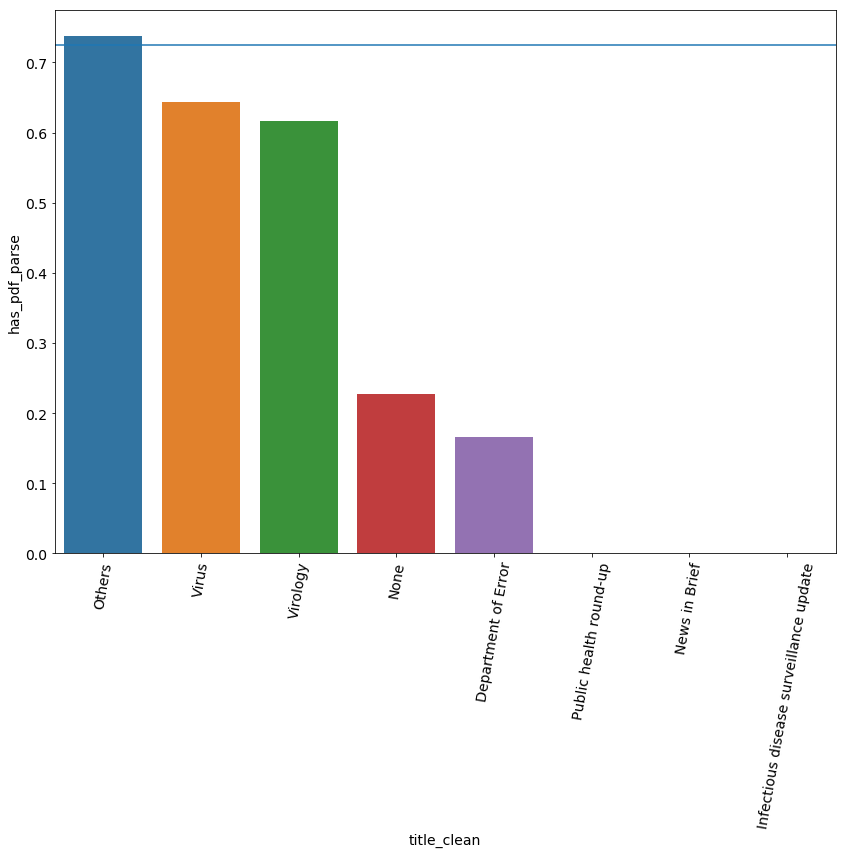

In [22]:
top_l2 = meta_dt.groupby('title_clean').mean()['has_pdf_parse'].sort_values(ascending=False)
plt.figure(figsize=(14,10))
sns.barplot(x=top_l2.index, y=top_l2)
plt.axhline(np.mean(meta_dt.has_pdf_parse))
plt.xticks(rotation=80)
plt.show()